In [8]:
import pandas as pd

# Read the CSV file from the 'data/processed' directory
df = pd.read_csv('/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/data/processed/datos_capa_7.csv')

# Display the first few rows of the dataframe
df.shape

(291, 1187)

In [9]:
# Verificar valores nulos
null_counts = df.isnull().sum()
null_columns = null_counts[null_counts > 0]
print("Columnas con valores nulos y su cantidad:")
print(null_columns)

Columnas con valores nulos y su cantidad:
description                      36
primary_language                 21
license_name                     21
security_policy_enabled          21
vulnerability_alerts_enabled     21
stargazers_count                 21
issue_count                      21
network_count                    21
subscribers_count                21
languages                        21
lang_javascript                  78
lang_typescript                 110
lang_shell                      223
lang_dockerfile                 259
lang_python                     284
lang_mustache                   290
lang_handlebars                 289
lang_html                       280
lang_kotlin                     288
lang_powershell                 287
lang_makefile                   282
lang_smarty                     290
lang_cmake                      288
lang_cplusplus                  287
lang_ruby                       289
lang_vue                        290
lang_css              

In [10]:
df.columns.tolist()


['repo_owner',
 'repo_name',
 'Number of Components',
 'vulnerability-proneness-all',
 'branches',
 'releases',
 'forks',
 'watchers',
 'stargazers',
 'contributors',
 'size',
 'totalIssues',
 'openIssues',
 'totalPullRequests',
 'openPullRequests',
 'codeLines',
 'vp-category-equalfreq',
 'description',
 'primary_language',
 'license_name',
 'security_policy_enabled',
 'vulnerability_alerts_enabled',
 'stargazers_count',
 'commit_count',
 'issue_count',
 'network_count',
 'subscribers_count',
 'languages',
 'lang_javascript',
 'lang_typescript',
 'lang_shell',
 'lang_dockerfile',
 'lang_python',
 'lang_mustache',
 'lang_handlebars',
 'lang_html',
 'lang_kotlin',
 'lang_powershell',
 'lang_makefile',
 'lang_smarty',
 'lang_cmake',
 'lang_cplusplus',
 'lang_ruby',
 'lang_vue',
 'lang_css',
 'lang_swift',
 'lang_rust',
 'lang_hcl',
 'lang_batchfile',
 'lang_c#',
 'lang_dart',
 'lang_julia',
 'lang_odin',
 'lang_java',
 'lang_nix',
 'lang_objective_c',
 'lang_jinja',
 'lang_nunjucks',
 'l

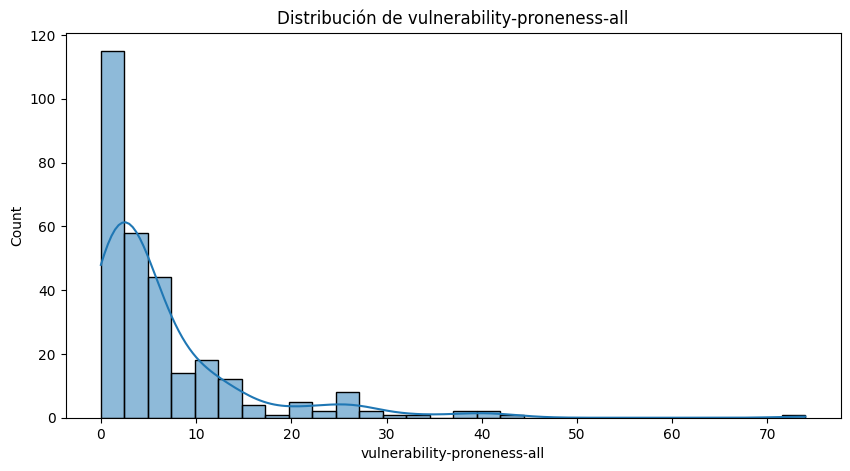

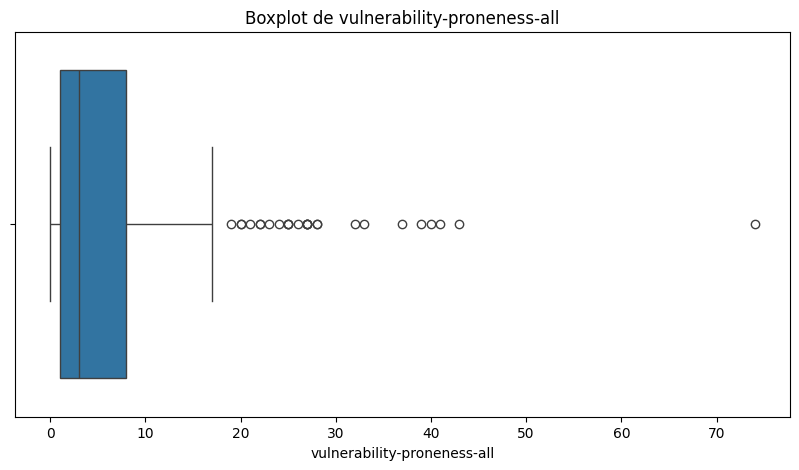

count    291.000000
mean       6.487973
std        8.877074
min        0.000000
25%        1.000000
50%        3.000000
75%        8.000000
max       74.000000
Name: vulnerability-proneness-all, dtype: float64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos

# Histogramas y KDE
plt.figure(figsize=(10,5))
sns.histplot(df['vulnerability-proneness-all'], kde=True, bins=30)
plt.title('Distribución de vulnerability-proneness-all')
plt.show()

# Boxplot para detectar outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=df['vulnerability-proneness-all'])
plt.title('Boxplot de vulnerability-proneness-all')
plt.show()

# Descripción estadística
df['vulnerability-proneness-all'].describe()


In [16]:
import numpy as np
from sklearn.cluster import KMeans

def categorize_vp_equalfreq(df):

    # Copia del dataframe para pruebas
    df_temp = df.copy()

    # Aplicar transformación logarítmica
    df_temp["log_vp"] = np.log1p(df_temp["vulnerability-proneness-all"])

    # Método 3: Equal Frequency Binning (Discretización con igual cantidad de muestras)
    df_temp["vp-category-equalfreq"] = pd.qcut(df_temp["log_vp"], q=2, labels=[0, 1])

    return df_temp

# Usar el método
df = categorize_vp_equalfreq(df)

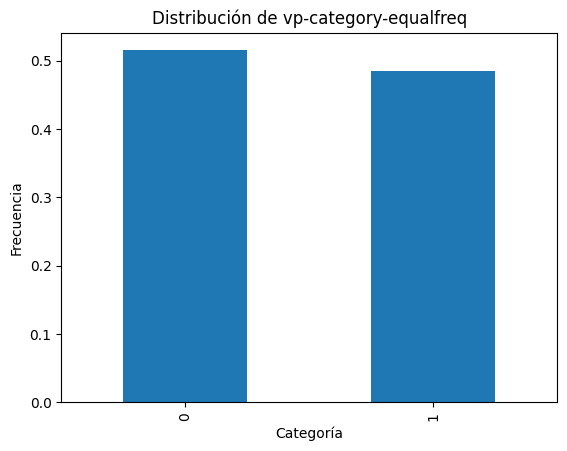

In [18]:
# Mostrar distribución de vp-category-equalfreq
df['vp-category-equalfreq'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribución de vp-category-equalfreq')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

In [14]:
df = df.drop(columns=['log_vp'])
df

,repo_owner,repo_name,Number of Components,vulnerability-proneness-all,branches,releases,forks,watchers,stargazers,contributors,...,desc_trigram_most_common_test_http_server,desc_trigram_most_common_tool_gener_github,desc_trigram_most_common_track_code_coverag,desc_trigram_most_common_turn_pull_request,desc_trigram_most_common_updat_commit_push,desc_trigram_most_common_updat_yaml_properti,desc_trigram_most_common_upload_aab_file,desc_trigram_most_common_use_browser_api,desc_trigram_most_common_valid_dependabot_yaml,desc_trigram_most_common_yet_anoth_upload
0,10up,action-repo-automator,50,2.0,3,7,4,43,18,5,...,0,0,0,0,0,0,0,0,0,0
1,1password,load-secrets-action,21,5.0,6,11,29,14,208,10,...,0,0,0,0,0,0,0,0,0,0
2,42crunch,api-security-audit-action,94,1.0,3,3,14,4,33,4,...,0,0,0,0,0,0,0,0,0,0
3,8398a7,action-slack,59,2.0,6,30,134,5,595,25,...,0,0,0,0,0,0,0,0,0,0
4,alexsim93,pull-request-analytics-action,79,5.0,5,30,11,3,118,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,yc-actions,yc-sls-container-deploy,104,2.0,7,7,9,2,30,7,...,0,0,0,0,0,0,0,0,0,0
287,yogeshpaliyal,upload-indus-appstore,34,3.0,7,6,0,1,19,1,...,0,0,0,0,0,0,1,0,0,0
288,yuichielectric,dive-action,42,2.0,16,4,14,2,11,3,...,0,0,0,0,0,0,0,0,0,0
289,yuzutech,annotations-action,28,3.0,2,18,16,3,37,7,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_new = pd.read_csv('/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/data/processed/datos_capa_7.csv')
df_new.shape

(291, 1187)

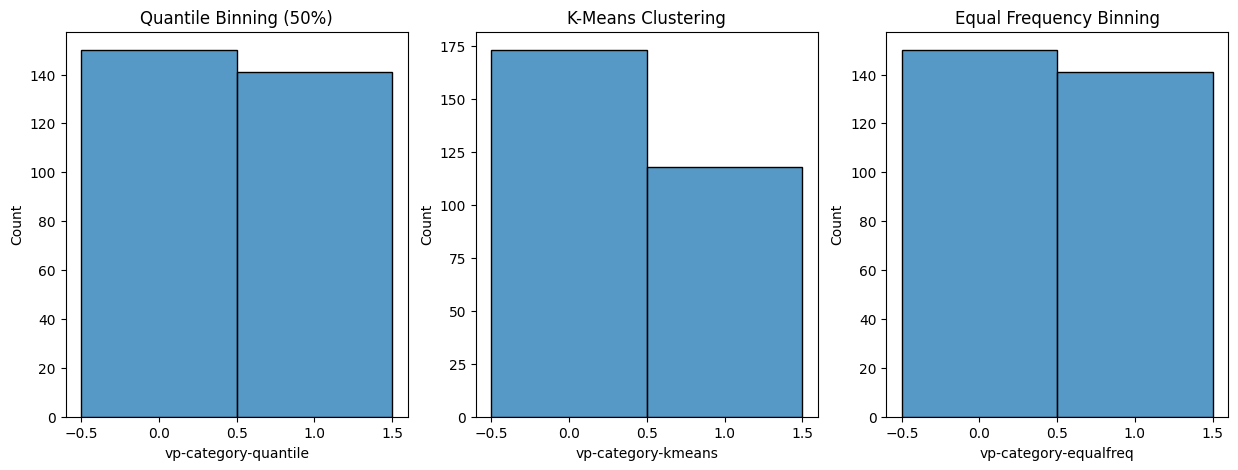

In [19]:
# Método 1: Quantile Binning ajustado (50%)
low_q = df_temp["log_vp"].quantile(0.5)

df_temp["vp-category-quantile"] = pd.cut(df_temp["log_vp"],
                                         bins=[-np.inf, low_q, np.inf],
                                         labels=[0, 1])

# Método 2: K-Means Clustering en datos transformados
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_temp["vp-category-kmeans"] = kmeans.fit_predict(df_temp[["log_vp"]])

# Método 3: Equal Frequency Binning (Discretización con igual cantidad de muestras)
df_temp["vp-category-equalfreq"] = pd.qcut(df_temp["log_vp"], q=2, labels=[0, 1])

# Comparar distribuciones
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_temp["vp-category-quantile"], discrete=True, ax=axes[0])
axes[0].set_title("Quantile Binning (50%)")

sns.histplot(df_temp["vp-category-kmeans"], discrete=True, ax=axes[1])
axes[1].set_title("K-Means Clustering")

sns.histplot(df_temp["vp-category-equalfreq"], discrete=True, ax=axes[2])
axes[2].set_title("Equal Frequency Binning")

plt.show()

# Mostrar distribución en números
df_distribution = pd.DataFrame({
    "Quantile Binning (50%)": df_temp["vp-category-quantile"].value_counts(normalize=True),
    "K-Means Clustering": df_temp["vp-category-kmeans"].value_counts(normalize=True),
    "Equal Frequency Binning": df_temp["vp-category-equalfreq"].value_counts(normalize=True),
})


In [4]:
import pandas as pd
# Read the CSV file from the 'data/raw' directory
df_raw = pd.read_csv('/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/data/processed/datos_capa_7.csv')

# Display the first few rows of the dataframe
df_raw.shape


(291, 1187)